#             Different-ML-Models-on-Heart-Attack-Prediction

- Random Forest
- Logistic Regression
- KNearest Neighbors

# Random Forest Classifier for Heart Attack Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split

# accuracy checkers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# random-forest-classifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
d = pd.read_csv('./kaggle/heart.csv')

In [4]:
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
d.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
d.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
d.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
y = d['target']
X = d.drop('target',axis=1)

In [10]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 )
print(X_train.shape,X_test.shape)

(212, 13) (91, 13)


In [13]:
# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# creating instance
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [15]:
pred = clf.predict(X_test)

# Accuracy Checking

In [16]:
asr = accuracy_score(y_test,pred)
print(asr)

0.8131868131868132


In [17]:
confusion_matrix(y_test, pred)

array([[28,  7],
       [10, 46]])

In [18]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        35
           1       0.87      0.82      0.84        56

    accuracy                           0.81        91
   macro avg       0.80      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



# Feature Importance

In [19]:
clf.feature_importances_

array([0.10349015, 0.03759543, 0.13645364, 0.08542226, 0.07253931,
       0.01055848, 0.02503171, 0.14273507, 0.05173256, 0.12790835,
       0.04929249, 0.09092779, 0.06631276])

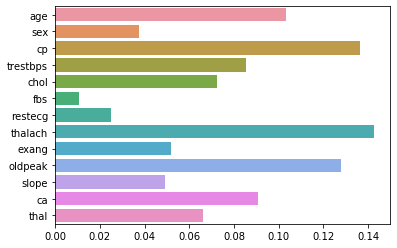

In [20]:
sns.barplot(x=clf.feature_importances_, y=X.columns)

# Genrating Model on Selected Relevant Features from feature importances

In [21]:
X = d[['thalach','cp','oldpeak','ca','age','chol','trestbps','exang','slope','thal','fbs']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
print(X_train.shape,X_test.shape)

(212, 11) (91, 11)


In [30]:
clf_ = RandomForestClassifier(n_estimators=50)
clf_.fit(X_train, y_train)
pred_ = clf_.predict(X_test)

In [31]:
asr = accuracy_score(y_test, pred_)
print(asr)

0.8351648351648352


In [32]:
confusion_matrix(y_test, pred_)
# Out of 47 actually positives, 38 seem to have predicted correctly
# Out of 44 actually negatives, 38 seem to have predicted correctly
# 6 were negative but predicted as positive
# 9 were positive but predicted as negative

array([[38,  6],
       [ 9, 38]])

In [33]:
print(classification_report(y_test, pred_))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84        44
           1       0.86      0.81      0.84        47

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.84      0.84      0.84        91



# Logistic Regression Classifier on Heart csv

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lgr = LogisticRegression()

In [43]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.3)

In [44]:
# scaling
X_train_ = scaler.fit_transform(X_train_)
X_test_ = scaler.transform(X_test_)

In [45]:
lgr.fit(X_train_ ,y_train_)

LogisticRegression()

In [46]:
pred_lgr = lgr.predict(X_test_)

# Accuracy Checking

In [47]:
asl = accuracy_score(y_test_, pred_lgr)
print(asl)

0.8901098901098901


In [48]:
confusion_matrix(y_test, pred_lgr)
# Out of 36 actually positives, 20 seem to have predicted correctly
# Out of 55 actually negatives, 31 seem to have predicted correctly
# 24 were negative but predicted as positive
# 16 were positive but predicted as negative

array([[20, 24],
       [16, 31]])

In [49]:
print(classification_report(y_test, pred_lgr))

              precision    recall  f1-score   support

           0       0.56      0.45      0.50        44
           1       0.56      0.66      0.61        47

    accuracy                           0.56        91
   macro avg       0.56      0.56      0.55        91
weighted avg       0.56      0.56      0.56        91



# KNeighborsClassifier on Heart csv

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
clf_knn = KNeighborsClassifier(n_neighbors=10)

In [52]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X, y, test_size=0.3)

In [53]:
# scaling
X_train_k = scaler.fit_transform(X_train_k)
X_test_k = scaler.transform(X_test_k)

In [54]:
clf_knn.fit(X_train_k, y_train_k)

KNeighborsClassifier(n_neighbors=10)

In [55]:
pred_knn = clf_knn.predict(X_test_k)

# Accuracy Checking

In [56]:
ask = accuracy_score(y_test_k, pred_knn)
print(ask)

0.8351648351648352


In [57]:
confusion_matrix(y_test_k, pred_knn)
# Out of 36 actually positives, 30 seem to have predicted correctly
# Out of 55 actually negatives, 46 seem to have predicted correctly
# 9 were negative but predicted as positive
# 6 were positive but predicted as negative

array([[30,  9],
       [ 6, 46]])

In [58]:
print(classification_report(y_test_k, pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        39
           1       0.84      0.88      0.86        52

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



# Comparison of accuracy of different classifiers

In [59]:
acc_score = [asr, asl, ask] # accuracy scores collected earlier
# asr - accuracy score random forest
# asl - accuracy score logistic
# ask - accuracy score knn
acc_score

[0.8351648351648352, 0.8901098901098901, 0.8351648351648352]

In [60]:
classifiers = ['Random Forest', 'Logistic Regression', 'KNeighborsClassifier']

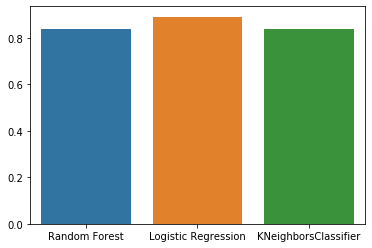

In [61]:
sns.barplot(x=classifiers, y=acc_score)

**Conclusion:** Depends on how many times the model is getting trained, may differ on maximum iterations,features selected and sizes of testing and training sets.